In [106]:
!pip install scikit-learn
!

## Módulos e base de dados

In [107]:
#Data Vizualizations
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

#Machine Learning Library
from sklearn.datasets import make_blobs # function to generate aleatory dataset
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn

#Math and Linear Algebra
import numpy as np
from math import sqrt
#Create DataFrames
import pandas as pd
## Séries históricas disponíveis em
## http://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/
arquivo_bovespa = '../COTAHIST_M102022.TXT'


## Estrutura do arquivo disponível em 
## http://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf
tamanho_campos=[2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]

dados_acoes=pd.read_fwf(arquivo_bovespa, widths=tamanho_campos, header=0)
dados_acoes

,00,COTAHIST,.2,022BOVESPA 2,022,1031,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,20221003,2.0,ELMD3,10,ELETROMIDIA,ON NM,NaN,R$,1080.0,...,680.0,216300.0,2.469914e+08,0.0,0.0,99991231.0,1.0,0.0,BRELMDACNOR3,100.0
1,1,20221003,2.0,OFSA3,10,OUROFINO S/A,ON NM,NaN,R$,2317.0,...,37.0,7300.0,1.664580e+07,0.0,0.0,99991231.0,1.0,0.0,BROFSAACNOR7,114.0
2,1,20221003,2.0,SMFT3,10,SMART FIT,ON NM,NaN,R$,1568.0,...,8482.0,1950600.0,3.148693e+09,0.0,0.0,99991231.0,1.0,0.0,BRSMFTACNOR1,109.0
3,1,20221003,2.0,HOME34,10,HOME DEPOT,DRN,NaN,R$,5253.0,...,494.0,27860.0,1.467964e+08,0.0,0.0,99991231.0,1.0,0.0,BRHOMEBDR002,143.0
4,1,20221003,2.0,BRGE3,10,ALFA CONSORC,ON,NaN,R$,995.0,...,2.0,200.0,1.912000e+05,0.0,0.0,99991231.0,1.0,0.0,BRBRGEACNOR6,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181802,1,20221019,78.0,ITSAI99,70,ITSA,PN N1,0.0,R$,243.0,...,3.0,1500.0,3.639000e+05,906.0,0.0,20230915.0,1.0,0.0,BRITSAACNPR7,412.0
181803,1,20221021,78.0,ITSAI99,70,ITSA,PN N1,0.0,R$,268.0,...,1.0,500.0,1.340000e+05,906.0,0.0,20230915.0,1.0,0.0,BRITSAACNPR7,412.0
181804,1,20221024,78.0,ITSAI99,70,ITSA,PN N1,0.0,R$,259.0,...,1.0,1000.0,2.590000e+05,906.0,0.0,20230915.0,1.0,0.0,BRITSAACNPR7,412.0
181805,1,20221025,78.0,ITSAI99,70,ITSA,PN N1,0.0,R$,255.0,...,4.0,1100.0,2.794000e+05,906.0,0.0,20230915.0,1.0,0.0,BRITSAACNPR7,412.0


<blockquote>Os dados tirados do bovespa são tirados do mês de outubro<blockquote>

In [108]:
#from google.colab import drive
#drive.mount('/content/drive')

## Pré-processamento dos dados 

#### Etapa 1 - Estruturação

 

##### Nomeação de colunas, eliminação da última linha e ajustes de valores com vírgula

In [109]:
## Nomear as colunas

dados_acoes.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Eliminar a última linha
linha=len(dados_acoes["data_pregao"])
dados_acoes=dados_acoes.drop(linha-1)

# Ajustar valores com virgula (dividir os valores dessas colunas por 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
]

for coluna in listaVirgula:
    dados_acoes[coluna]=[i/100. for i in dados_acoes[coluna]]


##### Tipos de dados

In [110]:
## Informações das variáveis
dados_acoes.info()

## Corrigir tipos de dados
#dados_acoes["data_pregao"]  = pd.to_datetime(dados_acoes["data_pregao"],infer_datetime_format=True) #Transforma para o tipo datetime64
dados_acoes["cod_negociacao"] = dados_acoes["cod_negociacao"].astype('|S') #Transforma o objeto em string
#dados_acoes["empresa"] = dados_acoes["empresa"].astype('|S') #Transforma o objeto em string
dados_acoes["codigo_isin"] = dados_acoes["codigo_isin"].astype('|S') #Transforma o objeto em string


dados_acoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181806 entries, 0 to 181805
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   tipo_registro                 181806 non-null  int64  
 1   data_pregao                   181806 non-null  object 
 2   cod_bdi                       181806 non-null  float64
 3   cod_negociacao                181806 non-null  object 
 4   tipo_mercado                  181806 non-null  int64  
 5   empresa                       181806 non-null  object 
 6   especificacao_papel           181806 non-null  object 
 7   prazo_dias_merc_termo         148349 non-null  float64
 8   moeda_referencia              181806 non-null  object 
 9   preco_abertura                181806 non-null  float64
 10  preco_maximo                  181806 non-null  float64
 11  preco_minimo                  181806 non-null  float64
 12  preco_medio                   181806 non-nul

#### Etapa 2 - Remoção de Dados Faltantes

In [111]:
#Identificar dados faltantes
dados_acoes.isnull().sum()

tipo_registro                       0
data_pregao                         0
cod_bdi                             0
cod_negociacao                      0
tipo_mercado                        0
empresa                             0
especificacao_papel                 0
prazo_dias_merc_termo           33457
moeda_referencia                    0
preco_abertura                      0
preco_maximo                        0
preco_minimo                        0
preco_medio                         0
preco_ultimo_negocio                0
preco_melhor_oferta_compra          0
preco_melhor_oferta_venda           0
numero_negocios                     0
quantidade_papeis_negociados        0
volume_total_negociado              0
preco_exercicio                     0
ìndicador_correcao_precos           0
data_vencimento                     0
fator_cotacao                       0
preco_exercicio_pontos              0
codigo_isin                         0
num_distribuicao_papel              0
dtype: int64

In [112]:
## Remover dados faltantes
dados_acoes = dados_acoes.dropna(axis=1)
dados_acoes.isnull().sum()

tipo_registro                   0
data_pregao                     0
cod_bdi                         0
cod_negociacao                  0
tipo_mercado                    0
empresa                         0
especificacao_papel             0
moeda_referencia                0
preco_abertura                  0
preco_maximo                    0
preco_minimo                    0
preco_medio                     0
preco_ultimo_negocio            0
preco_melhor_oferta_compra      0
preco_melhor_oferta_venda       0
numero_negocios                 0
quantidade_papeis_negociados    0
volume_total_negociado          0
preco_exercicio                 0
ìndicador_correcao_precos       0
data_vencimento                 0
fator_cotacao                   0
preco_exercicio_pontos          0
codigo_isin                     0
num_distribuicao_papel          0
dtype: int64

##### Representação Gráfica e Análise Descritiva

###### Análise da coluna Indicadores de Correção de Preços

{'mode': 0    0.0
Name: ìndicador_correcao_precos, dtype: float64, 'mean': 0.0, 'meadian': 0.0}


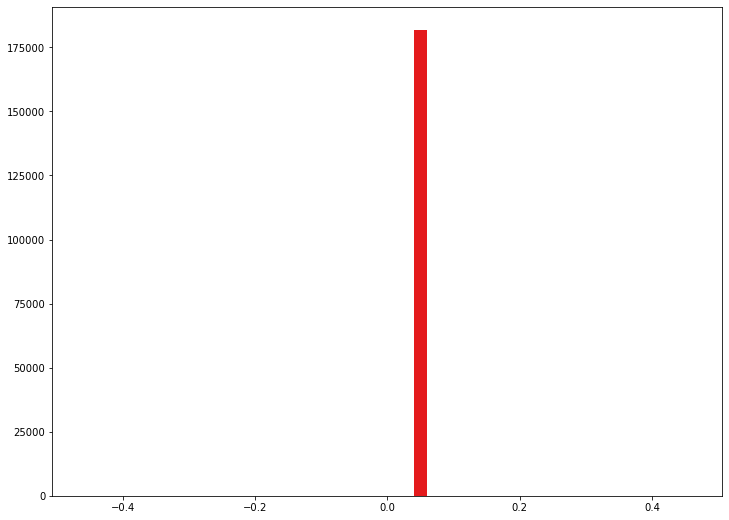

In [113]:
# Parecem haver dados ruidosos aqui
plt.hist(x = dados_acoes["ìndicador_correcao_precos"], rwidth = 0.2)
indicador_correcao_precos = {
    "mode" : dados_acoes["ìndicador_correcao_precos"].mode() ,
    "mean" : dados_acoes["ìndicador_correcao_precos"].mean() ,
    "meadian" : dados_acoes["ìndicador_correcao_precos"].median()
}
# Essa coluna não revela nada relevante
print(indicador_correcao_precos)
#Remoção da coluna dados_acoes["ìndicador_correcao_precos"]
dados_acoes = dados_acoes.drop(["ìndicador_correcao_precos"], axis = "columns")

###### Análise da coluna "preco_exercicio_pontos"

{'mode': 0    0.0
Name: preco_exercicio_pontos, dtype: float64, 'mean': 16459467.784341551, 'meadian': 0.0}


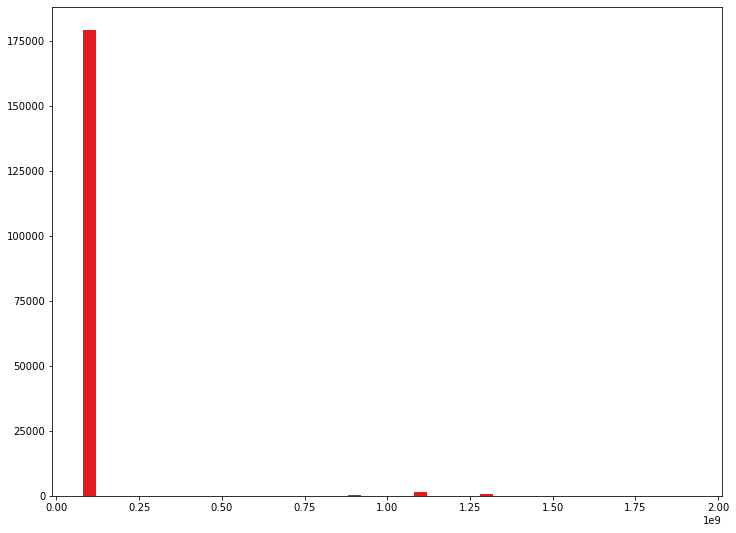

In [114]:
# Parecem haver dados ruidosos aqui
plt.hist(x = dados_acoes["preco_exercicio_pontos"], rwidth = 0.2)
preco_exercicio_pontos = {
    "mode" : dados_acoes["preco_exercicio_pontos"].mode() ,
    "mean" : dados_acoes["preco_exercicio_pontos"].mean() ,
    "meadian" : dados_acoes["preco_exercicio_pontos"].median()
}
# Essa coluna não revela nada relevante
print(preco_exercicio_pontos)
# Remoção da coluna
dados_acoes = dados_acoes.drop(["preco_exercicio_pontos"], axis = "columns")

In [115]:
dados_acoes

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,empresa,especificacao_papel,moeda_referencia,preco_abertura,preco_maximo,...,preco_melhor_oferta_compra,preco_melhor_oferta_venda,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,data_vencimento,fator_cotacao,codigo_isin,num_distribuicao_papel
0,1,20221003,2.0,b'ELMD3',10,ELETROMIDIA,ON NM,R$,10.80,11.73,...,11.40,11.44,680.0,216300.0,2469914.0,0.00,99991231.0,1.0,b'BRELMDACNOR3',100.0
1,1,20221003,2.0,b'OFSA3',10,OUROFINO S/A,ON NM,R$,23.17,23.17,...,22.50,22.75,37.0,7300.0,166458.0,0.00,99991231.0,1.0,b'BROFSAACNOR7',114.0
2,1,20221003,2.0,b'SMFT3',10,SMART FIT,ON NM,R$,15.68,16.60,...,16.07,16.12,8482.0,1950600.0,31486931.0,0.00,99991231.0,1.0,b'BRSMFTACNOR1',109.0
3,1,20221003,2.0,b'HOME34',10,HOME DEPOT,DRN,R$,52.53,52.84,...,51.12,52.76,494.0,27860.0,1467963.7,0.00,99991231.0,1.0,b'BRHOMEBDR002',143.0
4,1,20221003,2.0,b'BRGE3',10,ALFA CONSORC,ON,R$,9.95,9.95,...,9.00,9.70,2.0,200.0,1912.0,0.00,99991231.0,1.0,b'BRBRGEACNOR6',203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,1,20221018,78.0,b'ITSAI99',70,ITSA,PN N1,R$,2.37,2.37,...,2.43,3.00,1.0,1000.0,2370.0,9.06,20230915.0,1.0,b'BRITSAACNPR7',412.0
181802,1,20221019,78.0,b'ITSAI99',70,ITSA,PN N1,R$,2.43,2.43,...,0.06,3.00,3.0,1500.0,3639.0,9.06,20230915.0,1.0,b'BRITSAACNPR7',412.0
181803,1,20221021,78.0,b'ITSAI99',70,ITSA,PN N1,R$,2.68,2.68,...,2.74,0.00,1.0,500.0,1340.0,9.06,20230915.0,1.0,b'BRITSAACNPR7',412.0
181804,1,20221024,78.0,b'ITSAI99',70,ITSA,PN N1,R$,2.59,2.59,...,2.00,3.23,1.0,1000.0,2590.0,9.06,20230915.0,1.0,b'BRITSAACNPR7',412.0


#### > Essas colunas não serão úteis para a análise de dados, por isso foram excluídas do dataset

In [116]:
dados_acoes.drop(["moeda_referencia"], axis=1, inplace=True)
dados_acoes.drop(["fator_cotacao"], axis=1, inplace=True)

#### > Limitar os dados por empresa

In [117]:
dados_acoes["empresa"].value_counts()

PETRE           10027
VALEE            6220
PETR             4858
BBASE            3892
MGLUE            3198
                ...  
THE JM SMUCK        1
FII JASC REN        1
BUMBLE INC          1
WEC ENERGY G        1
PPL CORP            1
Name: empresa, Length: 2176, dtype: int64

##### > Nesse caso a PETRE

In [118]:
empresa_1 = dados_acoes[dados_acoes["empresa"] == "PETRE"]

## Como estão centrados os preços dos últimos negocios da PETRE?

#### Primeiro os dados dos preços do últimos negócios serão alocados para um objeto Series unidimensional 

In [119]:
PETRE = empresa_1["preco_ultimo_negocio"]
PETRE_arr = np.array(PETRE)
type(PETRE)
type(PETRE_arr)

#Ordenar preço dos últimos negócios da PETRE
PETRE_arr.sort()
print(PETRE_arr)

[1.000e-02 1.000e-02 1.000e-02 ... 4.877e+01 4.927e+01 4.977e+01]


In [120]:
PETRE.describe()

count    10027.000000
mean         4.105726
std          5.729424
min          0.010000
25%          0.240000
50%          1.700000
75%          5.750000
max         49.770000
Name: preco_ultimo_negocio, dtype: float64

#### O dicionário "central_tendency_measures" contém dados das medidas de tendência central do Series em questão

In [121]:

central_tendency_measures = {
    "mean": PETRE.mean(),
    "mode": PETRE.mode(dropna = True),
    "median": PETRE.median(), 
    "max": PETRE.max(),
    "min": PETRE.min(),
}
pd.Series(central_tendency_measures)

mean                                               4.105726
mode      0    0.01
Name: preco_ultimo_negocio, dtype: f...
median                                                  1.7
max                                                   49.77
min                                                    0.01
dtype: object

## Como estão distribuídos os preços das ações da PETRE?


#### Variability Measures
Existe uniformidade entre as medidas encontradas?

In [122]:

# output: [ 1  1  0  4 -5]
variability_measures = {
    "variance" : PETRE.var(),
    "standard deviation": PETRE.std(),
    "shifiting_range" : np.unique(shifting.shifting_range(PETRE_arr)),
    "CV" : variation(PETRE)
}
pd.Series(variability_measures)



NameError: name 'shifting' is not defined

#### A média está centralizada?


In [123]:
#Criar um gráfico que
    #Exibe a diferença entre o coeficiente de variação, a média e o desvio padrão
    

# - Exploração Inicial
##  Análise da empresa da Petrobrás no mês de outubro

### > Preço de último negócio

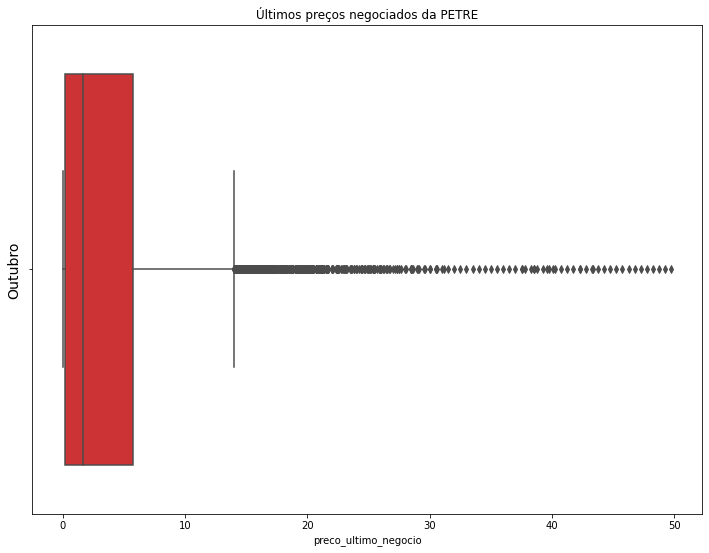

In [124]:
boxplot_empresa1_precoultimo_plt = sns.boxplot(x=empresa_1["preco_ultimo_negocio"]) # colocando o boxplot numa variável para manipular melhor
boxplot_empresa1_precoultimo_plt.set_ylabel('Outubro', fontsize=14) # Aqui você renomeia o eixo que deseja e o tamanho da fonte

boxplot_empresa1_precoultimo_plt.plot() # Aqui é como se o gráfico fosse ocultado até ser usado plt.show()

# em R$ - Reais
plt.title('Últimos preços negociados da PETRE') # O título que se deseja colocar acima do gráfico

plt.show() # Impressão do gráfico

### > Volume total negociado

In [125]:
empresa_1["volume_total_negociado"].std()

6105593.487115126

In [126]:
empresa_1["volume_total_negociado"].mean()

710625.8090156578

In [127]:
empresa_1["volume_total_negociado"].median()

38973.0

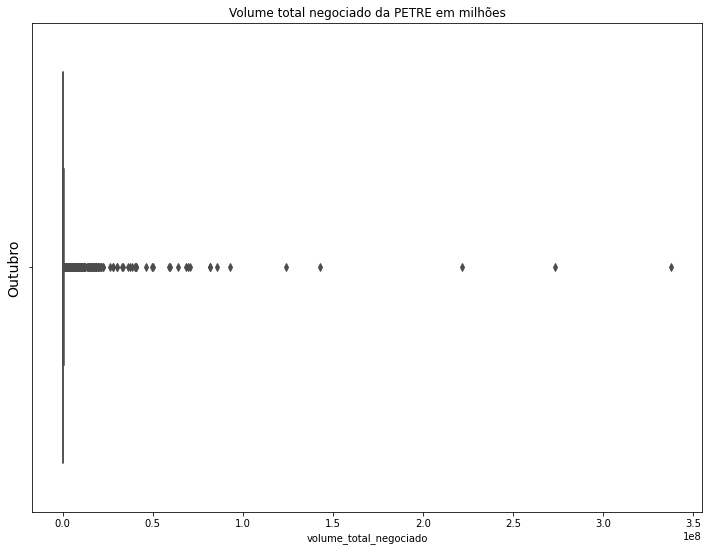

In [128]:
boxplot_empresa1_volumetotal_plt = sns.boxplot(x=empresa_1["volume_total_negociado"])
boxplot_empresa1_volumetotal_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_volumetotal_plt.plot()


plt.title('Volume total negociado da PETRE em milhões')

plt.show()

### > Número de negócios

In [129]:
empresa_1["numero_negocios"].std()

384.47835617497776

In [130]:
empresa_1["numero_negocios"].mean()

124.9536252119278

In [131]:
empresa_1["numero_negocios"].median()

13.0

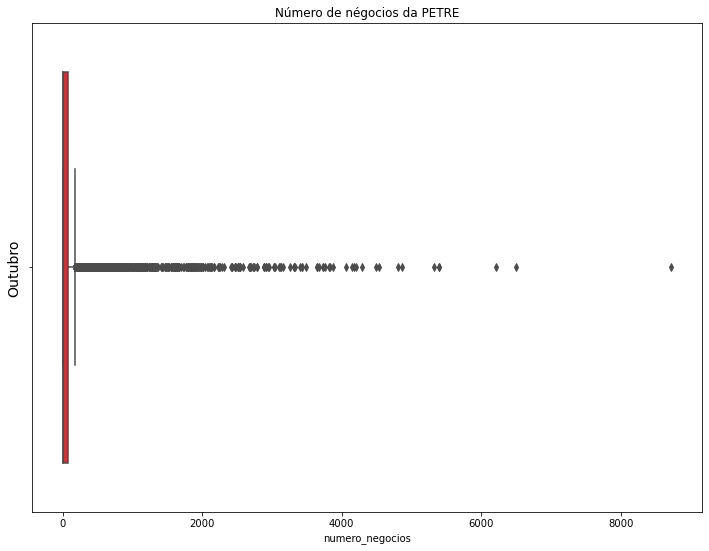

In [132]:
boxplot_empresa1_numeronegocios_plt = sns.boxplot(x=empresa_1["numero_negocios"])
boxplot_empresa1_numeronegocios_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_numeronegocios_plt.plot()


plt.title('Número de négocios da PETRE')

plt.show()

### > Preço máximo das ações

In [133]:
empresa_1["preco_maximo"].std()

5.776885233995972

In [134]:
empresa_1["preco_maximo"].mean()

4.266220205445284

In [135]:
empresa_1["preco_maximo"].median()

1.9

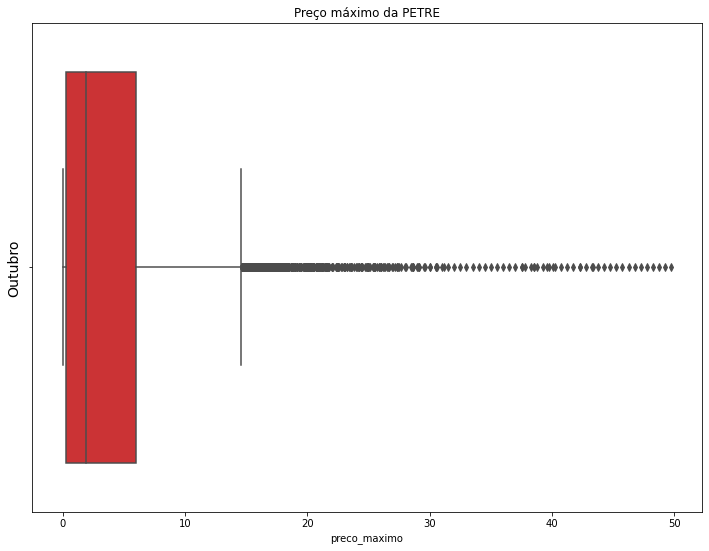

In [136]:
boxplot_empresa1_maximo_plt = sns.boxplot(x = empresa_1["preco_maximo"])
boxplot_empresa1_maximo_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_maximo_plt.plot()


plt.title('Preço máximo da PETRE') # em R$ - Reais

plt.show()

### > Preço mínimo das ações

In [137]:
empresa_1["preco_minimo"].std()

5.660947624318481

In [138]:
empresa_1["preco_minimo"].mean()

3.928716465543032

In [139]:
empresa_1["preco_minimo"].median()

1.5

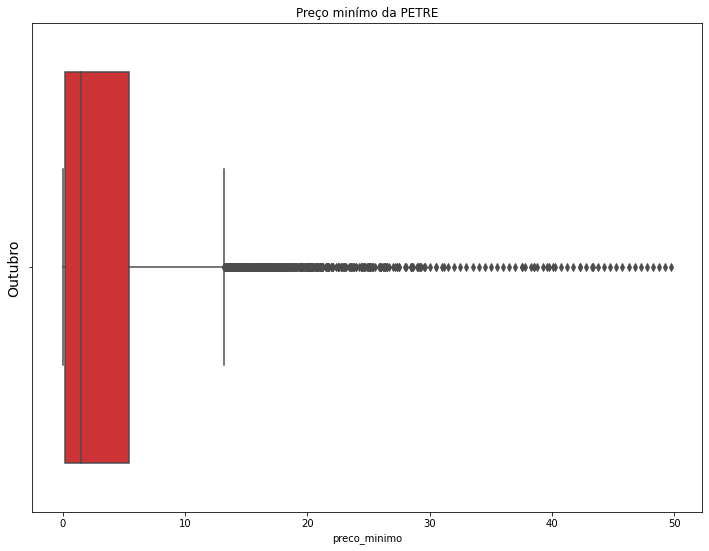

In [140]:
boxplot_empresa1_minimo_plt = sns.boxplot(x = empresa_1["preco_minimo"])
boxplot_empresa1_minimo_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_minimo_plt.plot()


plt.title('Preço minímo da PETRE') # em R$ - Reais

plt.show()

### > Preço de abertura das ações

In [141]:
empresa_1["preco_abertura"].mean()

4.093392839333776

In [142]:
empresa_1["preco_abertura"].std()

5.707135405067795

In [143]:
empresa_1["preco_abertura"].median()

1.71

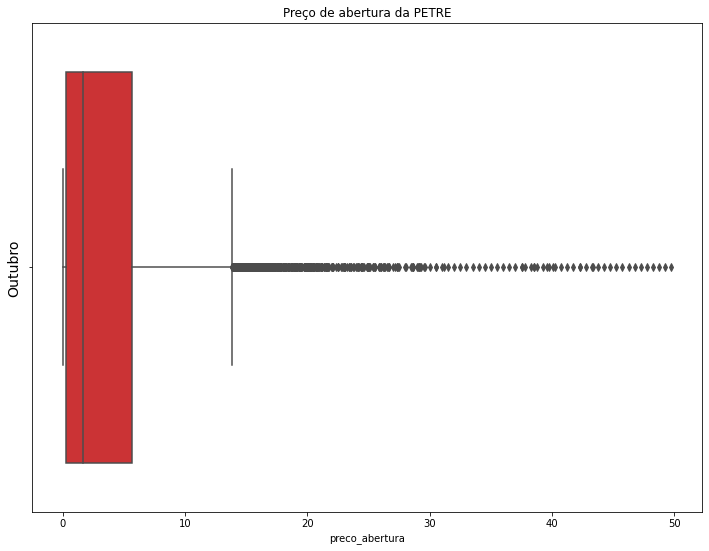

In [144]:
boxplot_empresa1_abertura_plt = sns.boxplot(x = empresa_1["preco_abertura"])
boxplot_empresa1_abertura_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_abertura_plt.plot()


plt.title('Preço de abertura da PETRE') # em R$ - Reais

plt.show()

### >> Tabela contendo a correlação geral

In [145]:
empresa_1[["preco_abertura", "preco_ultimo_negocio","preco_minimo","preco_maximo","numero_negocios","volume_total_negociado"]].corr()

,preco_abertura,preco_ultimo_negocio,preco_minimo,preco_maximo,numero_negocios,volume_total_negociado
preco_abertura,1.000000,0.997253,0.998526,0.998428,-0.109370,0.207455
preco_ultimo_negocio,0.997253,1.000000,0.998425,0.998670,-0.111930,0.206519
preco_minimo,0.998526,0.998425,1.000000,0.997138,-0.119470,0.207331
preco_maximo,0.998428,0.998670,0.997138,1.000000,-0.102856,0.206406
numero_negocios,-0.109370,-0.111930,-0.119470,-0.102856,1.000000,0.146719
volume_total_negociado,0.207455,0.206519,0.207331,0.206406,0.146719,1.000000


# Vizualização de Dados

### - Gráficos de Dispersão

<AxesSubplot:xlabel='preco_abertura', ylabel='preco_ultimo_negocio'>

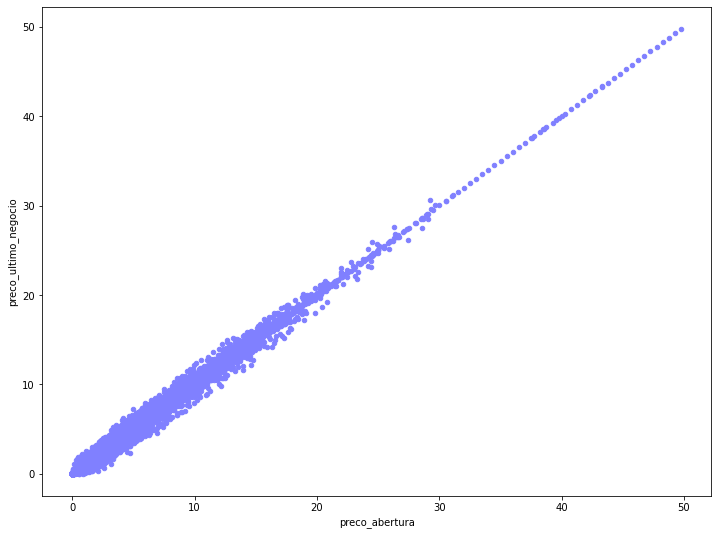

In [146]:
color=np.array([0.5, 0.5, 1]).reshape(1,-1)
empresa_1.plot.scatter(x="preco_abertura",y="preco_ultimo_negocio", c=color)

<AxesSubplot:xlabel='numero_negocios', ylabel='volume_total_negociado'>

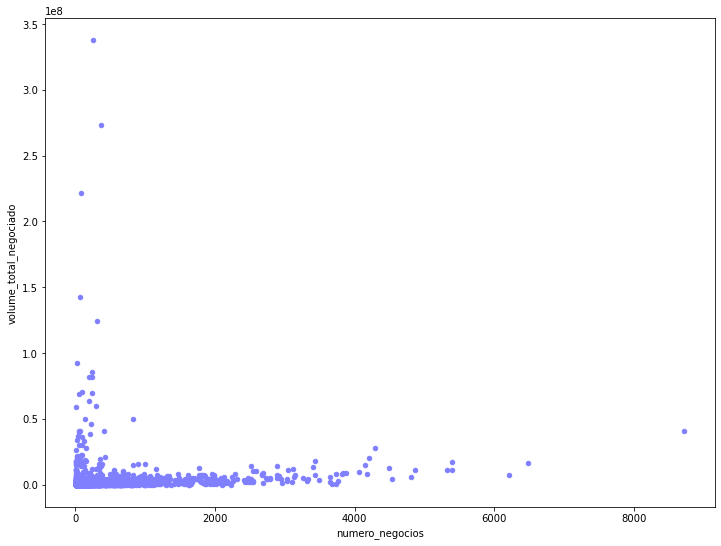

In [147]:
empresa_1.plot.scatter(x="numero_negocios",y="volume_total_negociado",c=color)

<AxesSubplot:xlabel='preco_minimo', ylabel='preco_maximo'>

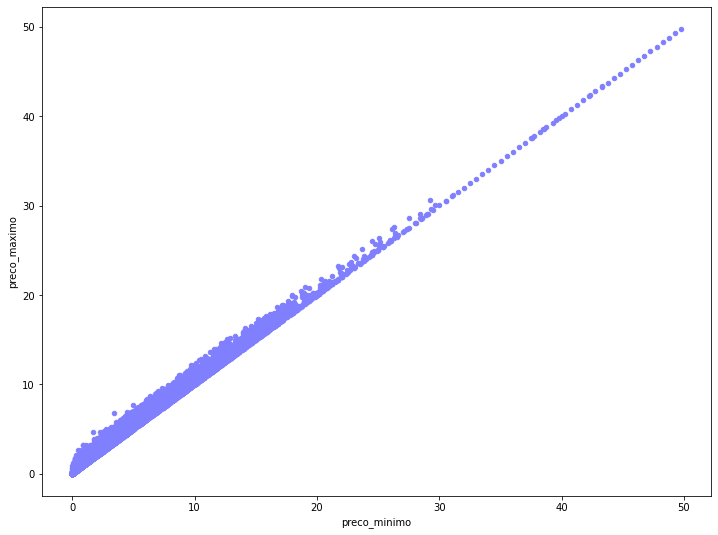

In [148]:
empresa_1.plot.scatter(x="preco_minimo",y="preco_maximo",c=color)

<AxesSubplot:xlabel='numero_negocios', ylabel='preco_ultimo_negocio'>

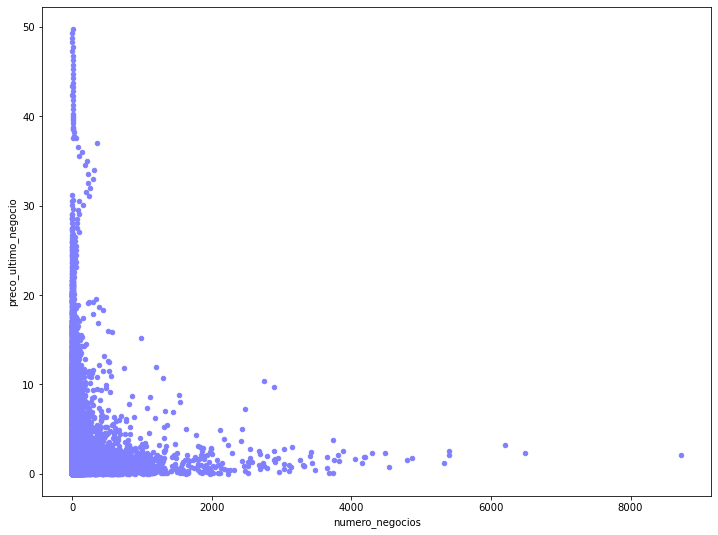

In [149]:
empresa_1.plot.scatter(x="numero_negocios",y="preco_ultimo_negocio",c=color)

<AxesSubplot:xlabel='volume_total_negociado', ylabel='preco_ultimo_negocio'>

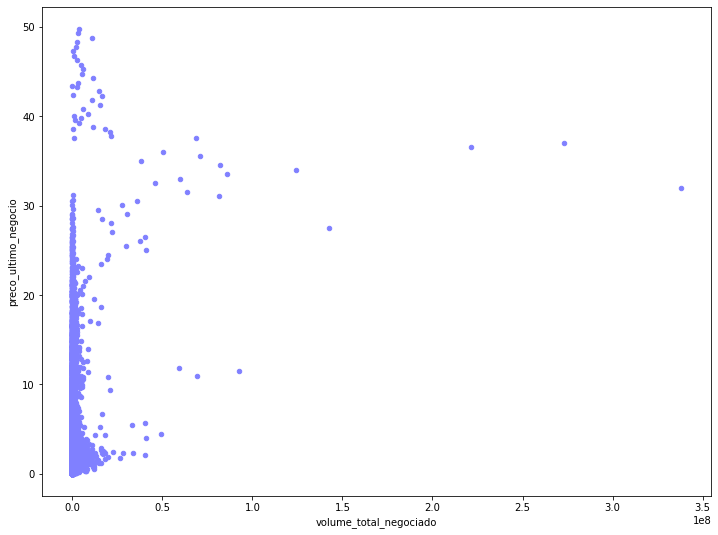

In [150]:
empresa_1.plot.scatter(x="volume_total_negociado",y="preco_ultimo_negocio",c=color)

In [151]:
#Using seaborn
sns.set_palette('Set1')

###### > Criando outros dataframes de outras a partir do dataframe principal e concatenando esses dados depois para servir como base para os gráficos

In [152]:
empresa_2 = dados_acoes[dados_acoes["empresa"] == "VALEE"]
empresa_3 = dados_acoes[dados_acoes["empresa"] == "BBASE"]
empresa_4 = dados_acoes[dados_acoes["empresa"] == "MGLUE"]

In [153]:
empresas = pd.concat([empresa_1, empresa_2, empresa_3, empresa_4])

In [154]:
empresas

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,empresa,especificacao_papel,preco_abertura,preco_maximo,preco_minimo,...,preco_ultimo_negocio,preco_melhor_oferta_compra,preco_melhor_oferta_venda,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,data_vencimento,codigo_isin,num_distribuicao_papel
56292,1,20221004,82.0,b'PETRW358',80,PETRE,ON N2,0.48,0.48,0.47,...,0.48,0.0,0.0,15.0,7500.0,3597.0,29.18,20221118.0,b'BRPETRACNOR9',196.0
56293,1,20221005,82.0,b'PETRW358',80,PETRE,ON N2,0.48,0.48,0.42,...,0.42,0.0,0.0,2.0,2000.0,900.0,29.18,20221118.0,b'BRPETRACNOR9',196.0
56294,1,20221006,82.0,b'PETRW358',80,PETRE,ON N2,0.36,0.36,0.22,...,0.22,0.0,0.0,3.0,6000.0,1530.0,29.18,20221118.0,b'BRPETRACNOR9',196.0
56295,1,20221007,82.0,b'PETRW358',80,PETRE,ON N2,0.23,0.29,0.23,...,0.29,0.0,0.0,17.0,15200.0,3775.0,29.18,20221118.0,b'BRPETRACNOR9',196.0
56296,1,20221011,82.0,b'PETRW358',80,PETRE,ON N2,0.30,0.30,0.30,...,0.30,0.0,0.0,1.0,3000.0,900.0,29.18,20221118.0,b'BRPETRACNOR9',196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180541,1,20221011,82.0,b'MGLUX840',80,MGLUE,ON NM,7.08,7.08,7.08,...,7.08,0.0,0.0,1.0,5500.0,38940.0,12.50,20221216.0,b'BRMGLUACNOR2',120.0
180542,1,20221019,82.0,b'MGLUX830',80,MGLUE,ON NM,7.76,7.76,7.76,...,7.76,0.0,0.0,1.0,600.0,4656.0,12.25,20221216.0,b'BRMGLUACNOR2',120.0
180543,1,20221019,82.0,b'MGLUX870',80,MGLUE,ON NM,6.92,6.92,6.92,...,6.92,0.0,0.0,1.0,1300.0,8996.0,11.25,20221216.0,b'BRMGLUACNOR2',120.0
180544,1,20221024,82.0,b'MGLUX870',80,MGLUE,ON NM,6.99,6.99,6.99,...,6.99,0.0,0.0,1.0,500.0,3495.0,11.25,20221216.0,b'BRMGLUACNOR2',120.0


<AxesSubplot:xlabel='data_pregao', ylabel='numero_negocios'>

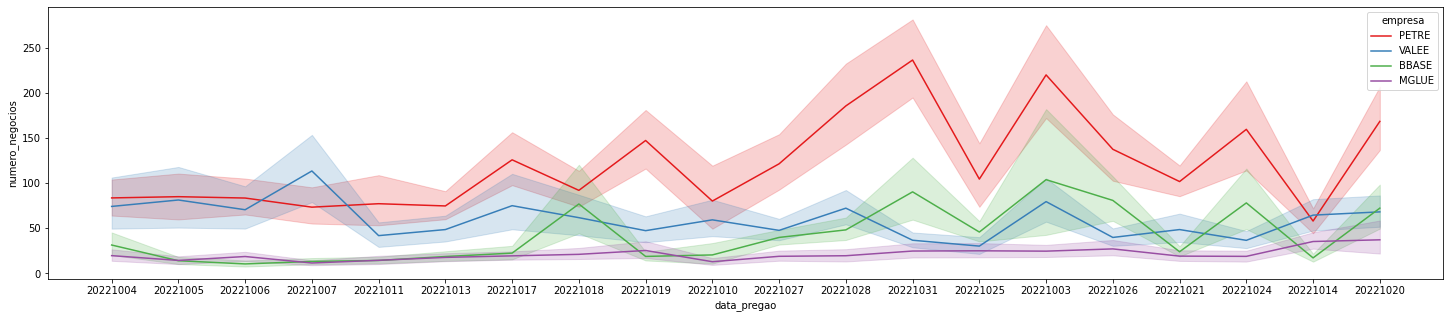

In [155]:
plt.figure(figsize=(25,5))
sns.lineplot(data=empresas, x="data_pregao", y="numero_negocios", hue="empresa")
# Lembrando que 202210 -> mes de outubro em 2022

<AxesSubplot:xlabel='data_pregao', ylabel='preco_ultimo_negocio'>

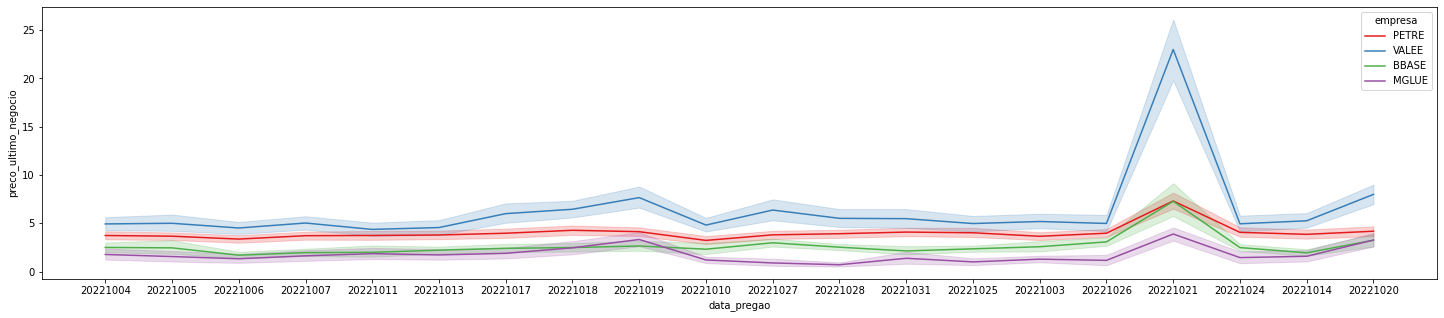

In [156]:
plt.figure(figsize=(25,5))
sns.lineplot(data=empresas, x="data_pregao", y="preco_ultimo_negocio", hue="empresa")

<AxesSubplot:xlabel='data_pregao', ylabel='volume_total_negociado'>

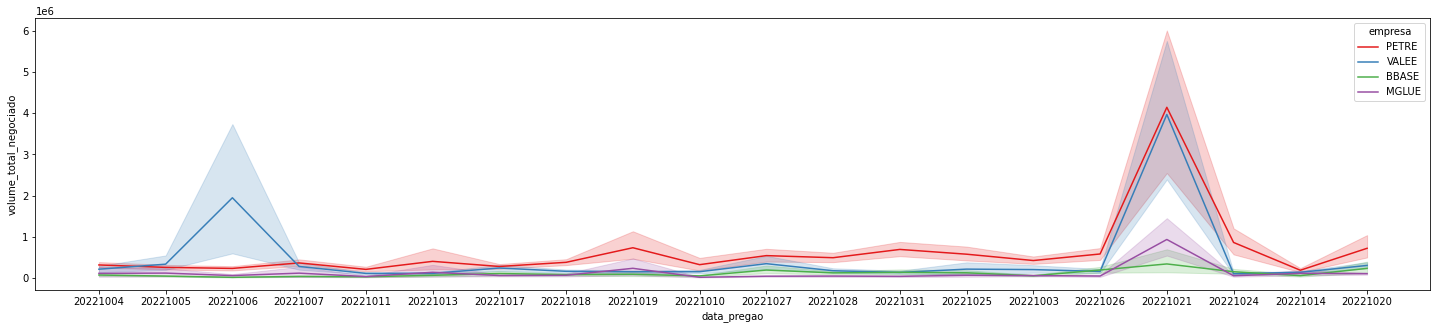

In [157]:
plt.figure(figsize=(25,5))
sns.lineplot(data=empresas, x="data_pregao", y="volume_total_negociado", hue="empresa")

<AxesSubplot:xlabel='data_pregao', ylabel='volume_total_negociado'>

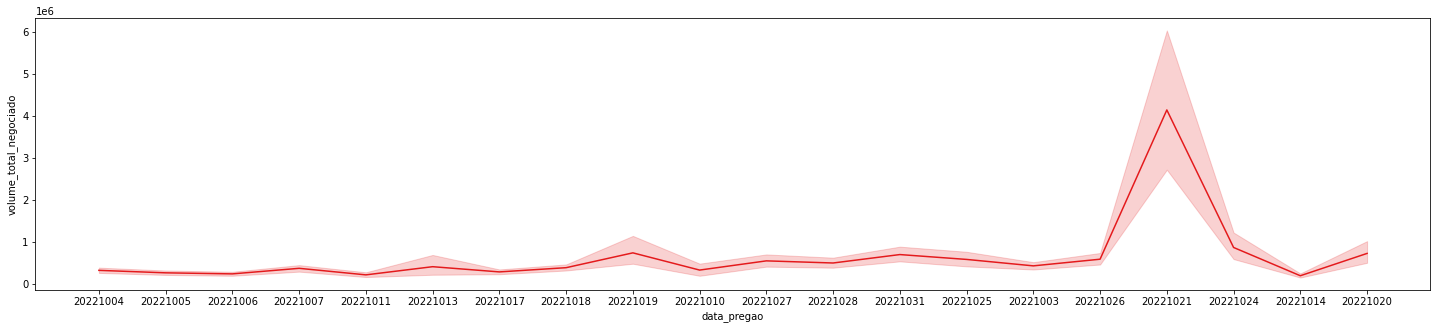

In [158]:
plt.figure(figsize=(25,5))
sns.lineplot(data=empresa_1, x="data_pregao", y="volume_total_negociado")



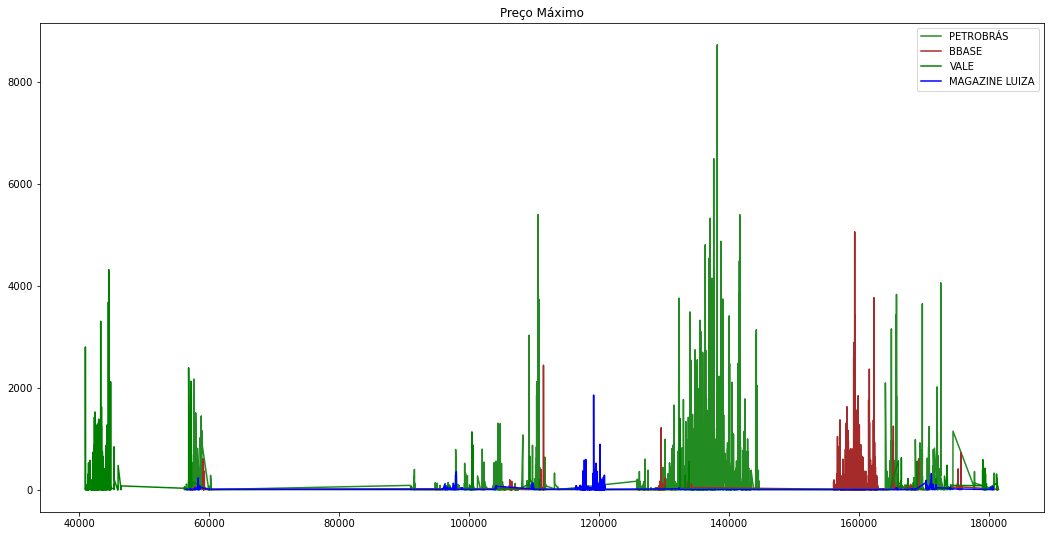

In [159]:
empresa_1['numero_negocios'].plot(label = "PETROBRÁS", color = "forestgreen", figsize = (18,9))
empresa_2['numero_negocios'].plot(label = "BBASE", color = 'brown')
empresa_3['numero_negocios'].plot(label = "VALE", color = 'green')
empresa_4['numero_negocios'].plot(label = "MAGAZINE LUIZA", color = 'blue')



plt.title('Preço Máximo')
plt.legend()
plt.show()

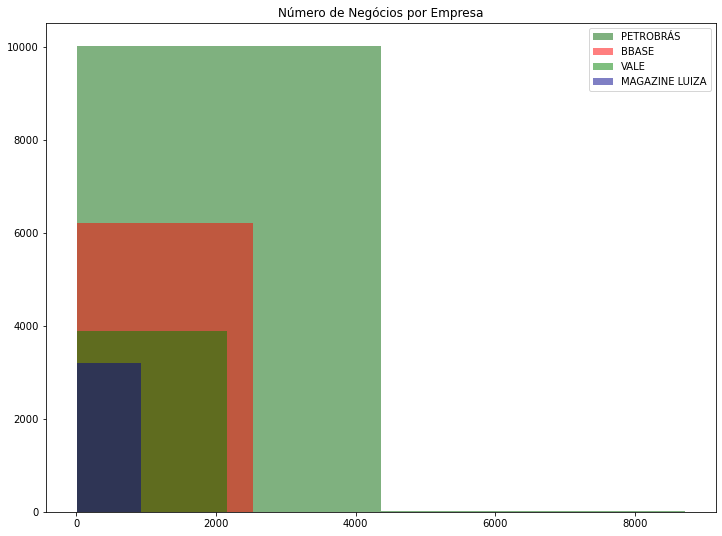

In [160]:
plt.hist(empresa_1['numero_negocios'], alpha=0.5, label='PETROBRÁS', bins=2, color='darkgreen')
plt.hist(empresa_2['numero_negocios'], alpha=0.5, label='BBASE', bins=2, color='red')
plt.hist(empresa_3['numero_negocios'], alpha=0.5, label='VALE', bins=2, color='g')
plt.hist(empresa_4['numero_negocios'], alpha=0.5, label='MAGAZINE LUIZA', bins=2, color='darkblue')
plt.title("Número de Negócios por Empresa")
plt.legend()
plt.rcParams['figure.figsize'] = (12, 9)

<AxesSubplot:xlabel='data_pregao', ylabel='preco_maximo'>

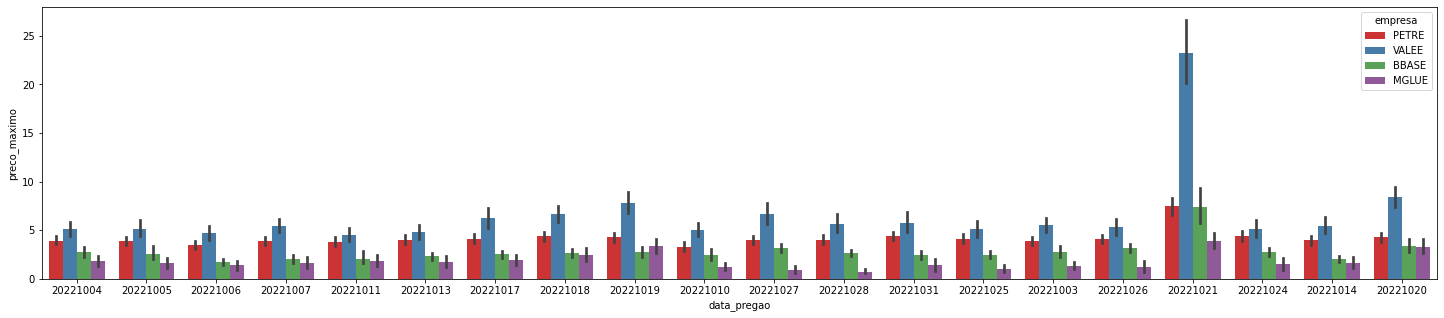

In [161]:
'''df = sns.load_dataset("empresas")'''
plt.figure(figsize=(25,5))
sns.barplot(data=empresas, x="data_pregao", y="preco_maximo", hue = "empresa")


In [162]:
fig = px.scatter(empresas, x = 'numero_negocios', y = 'preco_maximo', color = 'empresa', hover_name = "empresa", log_x = True, width = 800)
fig.update_traces(marker=dict(size = 10,line = dict(width = 1)),selector=dict(mode = 'markers'))
fig.update_layout(title = 'Análise de Nº de Negócios vs. Preço Máximo')
fig.update_xaxes(title = 'Nº de Negócios')
fig.update_yaxes(title = 'Preço Máximo')
fig.show()

<AxesSubplot:xlabel='numero_negocios', ylabel='empresa'>

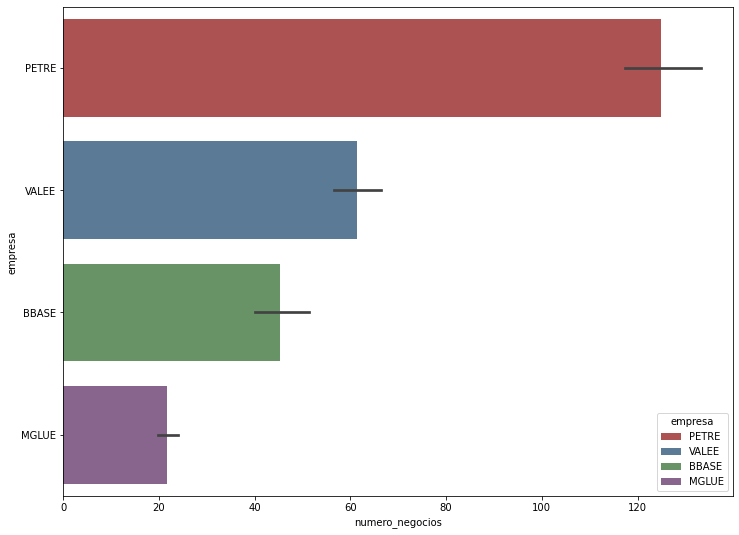

In [163]:
sns.barplot(data=empresas, y="empresa", x="numero_negocios", hue="empresa", saturation=0.45, orient = 'h', linewidth=3, dodge=False)


In [164]:
empresas_lite = empresas[["data_pregao", "empresa", "preco_abertura", "preco_maximo", "quantidade_papeis_negociados", "volume_total_negociado" ]]

In [165]:
empresas_lite['quantidade_papeis_negociados'].unique()

array([  7500.,   2000.,   6000., ..., 184100., 217400., 282000.])

In [166]:
emp1 = empresas_lite.loc[(empresas_lite['empresa'] == 'PETRE') & (empresas_lite['preco_maximo'] == 49.77)]
emp2 = empresas_lite.loc[(empresas_lite['empresa'] == 'VALEE') & (empresas_lite['preco_maximo'] == 113.66)]
emp3 = empresas_lite.loc[(empresas_lite['empresa'] == 'BBASE') & (empresas_lite['preco_maximo'] > 80)]
emp4 = empresas_lite.loc[(empresas_lite['empresa'] == 'MGLUE') & (empresas_lite['preco_maximo'] > 26.20)]

In [167]:
list = []
for value in empresas_lite.columns.values:
    list.append(value)

In [168]:
df = pd.DataFrame(emp1, columns = list)

In [169]:
dff = pd.concat([emp1, emp2, emp3, emp4])

## K-means (Algoritmo de Lloyd Max)

In [170]:
#import k-means module to work with
from sklearn.cluster import KMeans
#Transform the data in numpy 2d Array
x_axis = empresas[['preco_maximo','numero_negocios']].values 

In [171]:
# Data Standardization
scaler_object = StandardScaler()
x_axis = scaler_object.fit_transform(x_axis)
# Show stardizated data
x_axis

array([[-0.50152638, -0.23005445],
       [-0.50152638, -0.27567941],
       [-0.51680333, -0.2721698 ],
       ...,
       [ 0.31833645, -0.27918902],
       [ 0.327248  , -0.27918902],
       [-0.53589952, -0.27567941]])

### Ellbow Method to determine the number of clusters

In [172]:
wcss = [] #list to store kmeans.inertia_
for i in range(1,11):
    #Inicializate kmeans with i clusters for any interation
    kmeans = KMeans(n_clusters = i , random_state = 0)
    #Train data for any interation of for loop
    kmeans.fit(x_axis)
    wcss.append(kmeans.inertia_)
wcss

[46673.99999999997,
 32070.874102986483,
 19774.121423419056,
 13353.814603292236,
 9100.96350397698,
 7049.854890976563,
 5320.843778140238,
 4363.685294027333,
 3556.245385230191,
 3063.284170955457]

In [173]:
#Now, plot the graph and choose K
ellbow_graph = px.line(x = range(1,11) , y = wcss)
ellbow_graph.show()

In [174]:
df_group = empresa_1[['preco_maximo', 'numero_negocios']]

<AxesSubplot:>

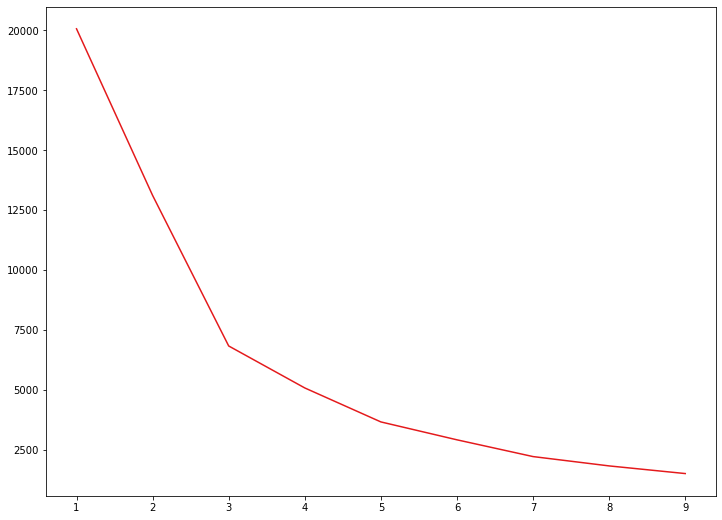

In [179]:
disps = []
scaler_object = StandardScaler()
df_group_elb = scaler_object.fit_transform(df_group)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_group_elb)
    disps.append(kmeans.inertia_)
sns.lineplot(x=range(1,10), y=disps)

In [183]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_group)

KMeans(n_clusters=4)

In [184]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 1])

In [185]:
sns.scatterplot(data=df_group, x='preco_maximo', y='numero_negocios', hue=kmeans.labels_)

C:\Users\maria\anaconda3\lib\site-packages\seaborn\_core.py:882: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



ValueError: Could not interpret value `preco_maximo` for parameter `x`

#### Algum padrão foi dectado?

#### Alguma nova pergunta foi descoberta ao analisar os agrupamentos?